<img src="images/intro.jpeg">

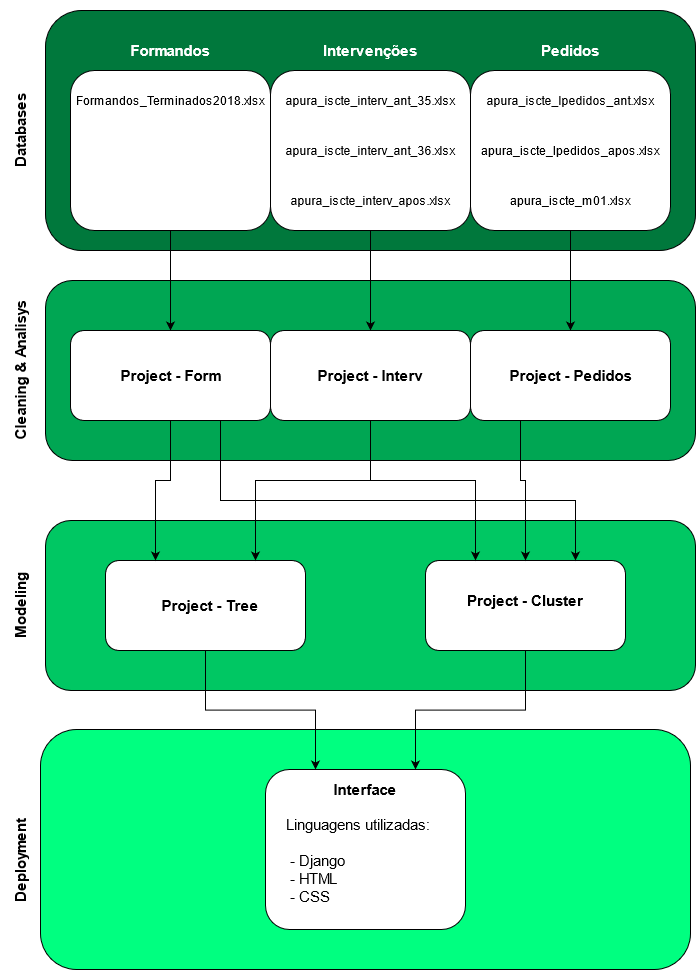

# Project - Modelo Clustering

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [547]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn import model_selection
import pickle
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn import mixture

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read Files</h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.1. Read Cursos</h3></center>
</div>

In [548]:
# Ler base de dados relativa aos cursos
cursos = pd.read_csv("databases/cursos.csv")

del cursos["Unnamed: 0"]
cursos.columns

Index(['UTE_ID', 'F_CCURSO', 'F_DCURSO', 'F_HORAS', 'TIPO_UTENTE',
       'F_CAREA_FORM', 'CATEGORIA', 'DCATEGORIA'],
      dtype='object')

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.2. Read Pedidos</h3></center>
</div>

In [549]:
# Ler base de dados relativa aos pedidos
pedidos = pd.read_csv("databases/pedidos.csv")

pedidos = pedidos.dropna()
del pedidos["Unnamed: 0"]
pedidos.columns

Index(['UTE_ID', 'CPP_PRETENDIDA', 'DCPP_PRETENDIDA', 'MOTIVO_INSCRICAO',
       'DMOTIVO_INSCRICAO'],
      dtype='object')

In [550]:
pedidos.head()

,UTE_ID,CPP_PRETENDIDA,DCPP_PRETENDIDA,MOTIVO_INSCRICAO,DMOTIVO_INSCRICAO
0,2548412,91110.0,TRABALHADOR DE LIMPEZA EM CASAS PARTICULARES,12,REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO
1,1102550,63100.0,AGRICULTOR DE SUBSISTÊNCIA,8,FIM DE TRABALHO NÃO PERMANENTE
2,6172405,82110.0,MONTADOR DE MAQUINARIA MECÂNICA,5,FOI DESPEDIDO
3,1068668,52490.0,"OUTROS TRABALHADORES RELACIONADOS COM VENDAS, NE",5,FOI DESPEDIDO
4,5113515,42210.0,EMPREGADO DAS AGÊNCIAS DE VIAGENS,8,FIM DE TRABALHO NÃO PERMANENTE


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.3. Read Formandos</h3></center>
</div>

In [551]:
# Ler base de dados relativa aos formandos
formandos = pd.read_csv("databases/formandos_limpo.csv")

del formandos["Unnamed: 0"]
formandos.columns

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['UTE_ID', 'CodCEFP', 'Descritivo CodMedidaOrcam', 'Sexo', 'IdadeEmAnos',
       'CodHabilitacao', 'CodNacionalidade', 'HorasForm', 'AreaFormacao',
       'NivelFormacaoAccao', 'CodSaidaProfissional', 'Sucessos',
       'DuracaoFormacao'],
      dtype='object')

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.4. Read Centros</h3></center>
</div>

In [552]:
# Ler ficheiro com informação dos centros de emprego por zona
centros = pd.read_excel("databases/AgrupamentoCentrosRegiao.xlsx")
centros.head(5)

,CodCEFP,Zona
0,302,Lisboa e Vale do Tejo
1,148,Norte
2,150,Norte
3,136,Norte
4,303,Lisboa e Vale do Tejo


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.5. Read Motivos de inscrição</h3></center>
</div>

In [553]:
# Ler ficheiro com a codifição dos motivos de inscrição
dados_motivo = pd.read_excel('databases\AgrupamentoMotivoInscricao.xlsx')

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">3. Merge DataFrames</h1></center>
</div>

In [554]:
# Realizar o merge entre tabela de formandos e de cursos
final_forms = formandos.merge(cursos, on="UTE_ID", how="left")
final_forms.shape

(117139, 20)

In [555]:
# Inserir o código relativo à zona dos formando: Norte, Centro, Alentejo, Algarve e Lisboa Vale do Tejo
final_forms = final_forms.merge(centros, on="CodCEFP", how="left")
final_forms.shape

(117139, 21)

In [556]:
# Eliminar algungs NA's gerados a partir do merge da Df formandos e da Df cursos
final_forms = final_forms.dropna()
final_forms.shape

(107230, 21)

In [557]:
# Juntar a variável motivo de inscrição à base de dados
final_forms = final_forms.merge(pedidos, on="UTE_ID", how="left")
final_forms.shape

(118196, 25)

In [558]:
# Eliminar duas colunas que não vão ser utilizadas
del final_forms['CPP_PRETENDIDA']
del final_forms['DCPP_PRETENDIDA']

In [559]:
# Filtro para preeencher as observações nulas de Motivo de inscrição com o campo "Outros Motivos" (99)

final_forms['DMOTIVO_INSCRICAO'] = final_forms['DMOTIVO_INSCRICAO'].fillna("OUTROS MOTIVOS")
final_forms['MOTIVO_INSCRICAO'] = final_forms['MOTIVO_INSCRICAO'].fillna(99)

In [560]:
final_forms = final_forms.merge(dados_motivo, on="DMOTIVO_INSCRICAO", how="left")
final_forms.head(3)

,UTE_ID,CodCEFP,Descritivo CodMedidaOrcam,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,...,F_DCURSO,F_HORAS,TIPO_UTENTE,F_CAREA_FORM,CATEGORIA,DCATEGORIA,Zona,MOTIVO_INSCRICAO,DMOTIVO_INSCRICAO,Motivo
0,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,...,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,621.0,5.0,OCUPADO,Centro,3.0,FIM DE CURSO DE FORMAÇÃO,fim_condicao_anterior
1,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,...,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,621.0,5.0,OCUPADO,Centro,12.0,REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO,outros_motivos
2,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,...,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,621.0,5.0,OCUPADO,Centro,12.0,REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO,outros_motivos


In [561]:
# Verificar nulos
final_forms.isna().sum()

UTE_ID                       0
CodCEFP                      0
Descritivo CodMedidaOrcam    0
Sexo                         0
IdadeEmAnos                  0
CodHabilitacao               0
CodNacionalidade             0
HorasForm                    0
AreaFormacao                 0
NivelFormacaoAccao           0
CodSaidaProfissional         0
Sucessos                     0
DuracaoFormacao              0
F_CCURSO                     0
F_DCURSO                     0
F_HORAS                      0
TIPO_UTENTE                  0
F_CAREA_FORM                 0
CATEGORIA                    0
DCATEGORIA                   0
Zona                         0
MOTIVO_INSCRICAO             0
DMOTIVO_INSCRICAO            0
Motivo                       7
dtype: int64

In [562]:
final_forms = final_forms.dropna()

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">4. Final DataFrame</h1></center>
</div>

In [563]:
# Filtrar apenas casos de sucesso
final_forms = final_forms[final_forms['Sucessos'] == 1]
final_forms.shape

(40312, 24)

In [564]:
# Verificar o número de duplicados no subconjunto UTE_ID e F_CCURSO
final_forms.duplicated(subset=["UTE_ID", "F_CCURSO"]).sum()

3733

In [565]:
# Eliminar duplicados para garantir que cada utente só está ligado a uma formação 1 única vez 
final_forms = final_forms.drop_duplicates(subset=["UTE_ID", "F_CCURSO"])

In [566]:
# Eliminar NA's
final_forms = final_forms.dropna()
final_forms.shape

(36579, 24)

In [567]:
# Guardar num csv final
final_forms.to_csv('databases/iefp_dados_combinados.csv')

In [568]:
final_forms.head(3)

,UTE_ID,CodCEFP,Descritivo CodMedidaOrcam,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,...,F_DCURSO,F_HORAS,TIPO_UTENTE,F_CAREA_FORM,CATEGORIA,DCATEGORIA,Zona,MOTIVO_INSCRICAO,DMOTIVO_INSCRICAO,Motivo
13,155241,501,Cursos de Especialização Tecnológica,1,51,12,PT,447.0,812,5,...,TÉCNICO/A ESPECIALISTA EM TURISMO DE AR LIVRE ...,1425.0,A,812.0,2.0,DESEMPREGADO-NOVO EMPREGO,Algarve,7.0,DESPEDIMENTO COM MÚTUO ACORDO,Despedimento
15,347421,204,Cursos de Especialização Tecnológica,0,50,12,PT,649.0,523,5,...,TÉCNICO/A DE CONTABILIDADE,1000.0,A,344.0,5.0,OCUPADO,Centro,12.0,REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO,outros_motivos
16,347421,204,Cursos de Especialização Tecnológica,0,50,12,PT,649.0,523,5,...,"AUTOMAÇÃO, ROBÓTICA E CONTROLO INDUSTRIAL",1560.0,A,523.0,5.0,OCUPADO,Centro,12.0,REINSCRIÇÃO NA SEQUÊNCIA DE FALTA CONV/CONTROLO,outros_motivos


<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">5. Preparação dos dados para modelação</h1></center>
</div>

<br>

Vamos efetuar as seguintes operações para preparar os dados para a modelação:

- Seleção de variáveis;
- Agrupamento de classes;
- Criação de variáveis dummy;
- Transformação de uma variável multiclasse em variável binária;
- Normalização dos dados;

In [578]:
# Leitura do csv com todos os dados
iefp = pd.read_csv('databases/iefp_dados_combinados.csv')

del iefp["Unnamed: 0"]

In [579]:
iefp.shape

(36579, 24)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.1. Seleção de features</h3></center>
</div>

In [726]:
# Seleção das features para o clustering
features = ['CodCEFP', 'IdadeEmAnos', 'CodHabilitacao',
            'HorasForm', 'AreaFormacao', 'NivelFormacaoAccao',
            'CATEGORIA', 'Zona', 'Motivo' , 'CodNacionalidade']

iefp_cursos = iefp[features + ["F_DCURSO"]]      # utilizado no fim para fazer as recomendações

# dataframe para servir como input para o cluster
iefp_cluster = iefp[features]
iefp_cluster.head()

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade
0,501,51,12,447.0,812,5,2.0,Algarve,Despedimento,PT
1,204,50,12,649.0,523,5,5.0,Centro,outros_motivos,PT
2,204,50,12,649.0,523,5,5.0,Centro,outros_motivos,PT
3,502,50,12,812.0,344,5,5.0,Algarve,Despedimento,PT
4,315,54,12,1099.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.2. Agrupar variável Habilitação</h3></center>
</div>
<br>
Vamos agrupar os diferentes níveis de habilitação em graus mais gerais de ensino:

- 1: Sem escolaridade;
- 2: Ensino Primário;
- 3: Ensino Básico;
- 4: Ensino Secundário;
- 5: Ensino Superior;

In [582]:
# Agrupamento de classes
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 1),'CodHabilitacao'] = 1
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 2),'CodHabilitacao'] = 1
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 4),'CodHabilitacao'] = 2
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 6),'CodHabilitacao'] = 3
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 9),'CodHabilitacao'] = 3
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 11),'CodHabilitacao'] = 4
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 12),'CodHabilitacao'] = 4
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 13),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 14),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 15),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 17),'CodHabilitacao'] = 5
iefp_cluster.loc[(iefp_cluster.CodHabilitacao == 20),'CodHabilitacao'] = 5

C:\Users\sarro\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [583]:
# Transformação da variável agrupada CodHabilitação em dummy
habs = pd.get_dummies(iefp_cluster["CodHabilitacao"], prefix="hab")

# Adicionar variável dummy ao dataframe
iefp_cluster = pd.concat([iefp_cluster, habs] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5
0,501,51,4,447.0,812,5,2.0,Algarve,Despedimento,PT,0,0,0,1,0
1,204,50,4,649.0,523,5,5.0,Centro,outros_motivos,PT,0,0,0,1,0
2,204,50,4,649.0,523,5,5.0,Centro,outros_motivos,PT,0,0,0,1,0
3,502,50,4,812.0,344,5,5.0,Algarve,Despedimento,PT,0,0,0,1,0
4,315,54,4,1099.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,0,0,1,0


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.3. Criar variável dummy para as Horas de formação (HorasForm)</h3></center>
</div>
<br>
Vamos agrupar por duração da formação(em horas):

- 1: Até 100 horas;
- 2: Entre 100 e 300 horas;
- 3: Entre 300 e 1000 horas;
- 4: Entre 1000 e 2000 horas;
- 5: Mais de 2000 horas;

In [584]:
# AGrupamentos de classes
iefp_cluster.loc[(iefp_cluster.HorasForm <= 100),'HorasForm'] = 1
iefp_cluster.loc[(iefp_cluster.HorasForm > 100) & (iefp_cluster.HorasForm <= 300),'HorasForm'] = 2
iefp_cluster.loc[(iefp_cluster.HorasForm > 300) & (iefp_cluster.HorasForm <= 1000),'HorasForm'] = 3
iefp_cluster.loc[(iefp_cluster.HorasForm > 1000) & (iefp_cluster.HorasForm <= 2000),'HorasForm'] = 4
iefp_cluster.loc[(iefp_cluster.HorasForm > 2000),'HorasForm'] = 5

In [585]:
# Verificar transformação
iefp_cluster["HorasForm"].value_counts()

1.0    21957
2.0     7501
3.0     5556
4.0     1549
5.0       16
Name: HorasForm, dtype: int64

In [586]:
# Transformação da variável agrupada HorasForm em dummy
horas = pd.get_dummies(iefp_cluster["HorasForm"], prefix="horas")

# Adicionar variável dummy ao dataframe
iefp_cluster = pd.concat([iefp_cluster, horas] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,horas_4.0,horas_5.0
0,501,51,4,3.0,812,5,2.0,Algarve,Despedimento,PT,0,0,0,1,0,0,0,1,0,0
1,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,0,0,0,1,0,0,0,1,0,0
2,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,0,0,0,1,0,0,0,1,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,Despedimento,PT,0,0,0,1,0,0,0,1,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,0,0,1,0,0,0,0,1,0


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.4. Criar variável dummy para a Area da Formação</h3></center>
</div>

In [587]:
# Criação de uma dummy variable para a variável AreaFormacao
areas = pd.get_dummies(iefp_cluster["AreaFormacao"], prefix="area")

# Adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, areas] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,...,area_811,area_812,area_813,area_814,area_815,area_840,area_850,area_861,area_862,area_999
0,501,51,4,3.0,812,5,2.0,Algarve,Despedimento,PT,...,0,1,0,0,0,0,0,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,0,0,0,0,0,0,0,0
2,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,0,0,0,0,0,0,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,Despedimento,PT,...,0,0,0,0,0,0,0,0,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,...,0,0,0,0,0,0,0,0,0,0


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.5. Criar variável dummy para o Nível da Formação</h3></center>
</div>

In [588]:
# Criação de uma dummy vaiable para a variável relativa ao nível de formação dos utentes
niveis = pd.get_dummies(iefp_cluster["NivelFormacaoAccao"], prefix="nivel")

# Adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, niveis] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,...,area_862,area_999,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_L,nivel_T
0,501,51,4,3.0,812,5,2.0,Algarve,Despedimento,PT,...,0,0,0,0,0,0,0,1,0,0
1,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,0,0,0,0,0,1,0,0
2,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,0,0,0,0,0,1,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,Despedimento,PT,...,0,0,0,0,0,0,0,1,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,...,0,0,0,0,0,0,0,1,0,0


In [589]:
iefp_cluster.shape

(36579, 70)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.6. Criar variável dummy para as Categorias</h3></center>
</div>

In [590]:
# Criação de uma dummy vaiable para a variável relativa às Categorias
cat = pd.get_dummies(iefp_cluster["CATEGORIA"], prefix="cat")

# Adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, cat] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,...,nivel_3,nivel_4,nivel_5,nivel_L,nivel_T,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0
0,501,51,4,3.0,812,5,2.0,Algarve,Despedimento,PT,...,0,0,1,0,0,0,1,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,1,0,0,0,0,0,0,1
2,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,1,0,0,0,0,0,0,1
3,502,50,4,3.0,344,5,5.0,Algarve,Despedimento,PT,...,0,0,1,0,0,0,0,0,0,1
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,...,0,0,1,0,0,0,0,0,0,1


In [591]:
iefp_cluster.sum(axis=0)

CodCEFP            9280280
IdadeEmAnos        1421020
CodHabilitacao      135483
HorasForm            59903
AreaFormacao      21544081
                    ...   
cat_1.0               2537
cat_2.0              10785
cat_3.0               4682
cat_4.0                285
cat_5.0              18290
Length: 75, dtype: object

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.7. Criar variável dummy para as Zonas</h3></center>
</div>

In [592]:
# Criação de uma dummy vaiable para a variável agrupada Zona
zonas = pd.get_dummies(iefp_cluster["Zona"], prefix="zona")

# Adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, zonas] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,...,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0,zona_Alentejo,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte
0,501,51,4,3.0,812,5,2.0,Algarve,Despedimento,PT,...,0,1,0,0,0,0,1,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,0,0,1,0,0,1,0,0
2,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,PT,...,0,0,0,0,1,0,0,1,0,0
3,502,50,4,3.0,344,5,5.0,Algarve,Despedimento,PT,...,0,0,0,0,1,0,1,0,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,...,0,0,0,0,1,0,0,0,1,0


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.8. Criar variável binária para a Nacionalidade</h3></center>
</div>

Neste bloco vamos colocar o valor numérico de 1 para a Nacionalidade Portuguesa e 0 para outras nacionalidades

In [593]:
# Alterar valores diretamente na variável Nacionalidade
iefp_cluster.loc[(iefp_cluster.CodNacionalidade != "PT"),'CodNacionalidade'] = 0
iefp_cluster.loc[(iefp_cluster.CodNacionalidade == "PT"),'CodNacionalidade'] = 1

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.9. Criar variável dummy para o motivo de inscrição</h3></center>
</div>

In [594]:
# criação de uma dummy vaiable para a variável agrupada motivo de inscrição
motivo = pd.get_dummies(iefp_cluster["Motivo"], prefix="mot")

# adicionar dummy à base de dados
iefp_cluster = pd.concat([iefp_cluster, motivo] , axis=1)
iefp_cluster.head(5)

,CodCEFP,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
0,501,51,4,3.0,812,5,2.0,Algarve,Despedimento,1,...,1,0,0,0,1,0,0,0,0,0
1,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,1,...,0,1,0,0,0,0,0,0,0,1
2,204,50,4,3.0,523,5,5.0,Centro,outros_motivos,1,...,0,1,0,0,0,0,0,0,0,1
3,502,50,4,3.0,344,5,5.0,Algarve,Despedimento,1,...,1,0,0,0,1,0,0,0,0,0
4,315,54,4,4.0,481,5,5.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,1,...,0,0,1,0,0,1,0,0,0,0


In [595]:
# Apagar colunas 
del iefp_cluster["CodCEFP"] 
del iefp_cluster["CodHabilitacao"]
del iefp_cluster["HorasForm"]
del iefp_cluster["AreaFormacao"]
del iefp_cluster["NivelFormacaoAccao"]
del iefp_cluster["CATEGORIA"]
del iefp_cluster["Zona"]
del iefp_cluster["Motivo"]

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.10. Normalização dos dados</h3></center>
</div>

In [596]:
# normalizacao das variaveis
scaler = MinMaxScaler().fit(iefp_cluster)
iefp_norm = pd.DataFrame(scaler.transform(iefp_cluster)) # dados dos utentes de sucesso normalizados

In [597]:
# Verificar normalização
iefp_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.00000,...,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000,36579.000000
mean,0.412226,0.972908,0.007272,0.043304,0.372892,0.391372,0.185161,0.600262,0.205063,0.15189,...,0.052407,0.261024,0.299516,0.273764,0.402335,0.495804,0.001422,0.008147,0.025397,0.066896
std,0.203220,0.162354,0.084966,0.203542,0.483580,0.488064,0.388433,0.489851,0.403753,0.35892,...,0.222850,0.439199,0.458052,0.445895,0.490375,0.499989,0.037678,0.089892,0.157330,0.249846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245283,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.415094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.566038,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [598]:
# Trocar número da coluna pelo seu nome
iefp_norm.columns = iefp_cluster.columns

In [599]:
iefp_norm.head(3)

,IdadeEmAnos,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
0,0.641509,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.622642,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.622642,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [750]:
iefp_norm.columns

Index(['IdadeEmAnos', 'CodNacionalidade', 'hab_1', 'hab_2', 'hab_3', 'hab_4',
       'hab_5', 'horas_1.0', 'horas_2.0', 'horas_3.0', 'horas_4.0',
       'horas_5.0', 'area_10', 'area_213', 'area_215', 'area_222', 'area_225',
       'area_322', 'area_341', 'area_342', 'area_343', 'area_344', 'area_345',
       'area_346', 'area_347', 'area_481', 'area_521', 'area_522', 'area_523',
       'area_524', 'area_525', 'area_541', 'area_542', 'area_543', 'area_582',
       'area_621', 'area_622', 'area_623', 'area_624', 'area_724', 'area_725',
       'area_729', 'area_761', 'area_762', 'area_811', 'area_812', 'area_813',
       'area_814', 'area_815', 'area_840', 'area_850', 'area_861', 'area_862',
       'area_999', 'nivel_0', 'nivel_1', 'nivel_2', 'nivel_3', 'nivel_4',
       'nivel_5', 'nivel_L', 'nivel_T', 'cat_1.0', 'cat_2.0', 'cat_3.0',
       'cat_4.0', 'cat_5.0', 'zona_Alentejo', 'zona_Algarve', 'zona_Centro',
       'zona_Lisboa e Vale do Tejo', 'zona_Norte', 'mot_Despedimento',
      

In [600]:
iefp_norm.to_csv('databases/dados_normalizados_cluster.csv')

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">6. Conjunto treino / teste</h1></center>
</div>

<br>

Para testar o modelo, são divididos os dados em 80% para o conjunto treino e os restantes para o conjunto de teste.

In [601]:
# divisao treino/teste dos dados normalizados
train, test = train_test_split(iefp_norm, 
                 train_size=0.9, 
                 random_state=5)

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">7. Clustering</h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">7.1 Encontrar número ótimo de clusters</h3></center>
</div>

In [336]:
## selecionar o número de clusters/componentes a usar

scores = []    # valores do average log-likelihood score
aic = []       # valores do aic de cada modelo


# Correr algoritmo de cluster com 1 centroid até 19 centroids
for i in range(1, 20):
    
    modelo = mixture.GaussianMixture(n_components=i)
    modelo.fit(train)
    
    # guarda resultados de cada iteracao:
    scores.append(modelo.score(train, test))
    aic.append(modelo.aic(test))

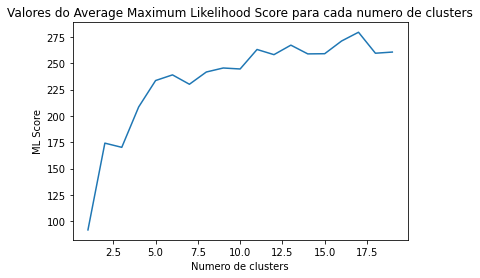

In [337]:
# Gráfico Likelihood
plt.plot(range(1,20), scores)
plt.title('Valores do Average Maximum Likelihood Score para cada numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('ML Score')
plt.show()

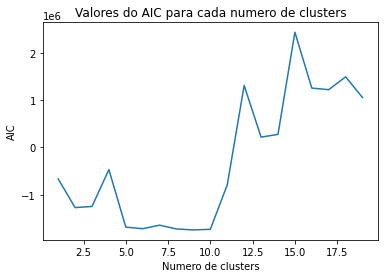

In [338]:
# Gráfico AIC
plt.plot(range(1,20), aic)
plt.title('Valores do AIC para cada numero de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('AIC')
plt.show()

Tanto as métricas AIC e ML-Score indicam que podem ser usados 15 clusters.

In [339]:
# Construção do modelo com 16 clusters
modelo_GMM = mixture.GaussianMixture(n_components=16)
modelo_GMM.fit(iefp_norm)

GaussianMixture(n_components=16)

In [340]:
filename = 'cluster_model.sav'
pickle.dump(modelo_GMM, open(filename, 'wb'))

In [341]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(train, test)
print(result)

264.59074378319747


In [342]:
print(loaded_model)

GaussianMixture(n_components=16)


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">7.2 Previsões cluster</h3></center>
</div>

In [343]:
# Exemplo previsao da label/grupo
modelo_GMM.predict(test)[0:10]

array([12, 13,  1,  3,  8, 11, 13,  3,  7,  5], dtype=int64)

In [344]:
# Devolve as probabilidades de cada observação pertencer a cada um dos clusters
predict = pd.DataFrame(modelo_GMM.predict_proba(test))
predict.round(5).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">7.3 Avaliação dos centroids</h3></center>
</div>

In [345]:
centroid = pd.DataFrame(modelo_GMM.means_)
centroid.columns = iefp_norm.columns

In [346]:
# Verificar os centroids devolvidos pelo cluster (normalizados)
centroid

,IdadeEmAnos,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
0,0.392660,0.973333,0.000000,0.000000,0.000000,1.000000,0.000000,0.778824,0.111373,0.066667,...,0.058824,0.187451,0.191373,0.372549,0.103529,0.859608,0.000000,0.000000,0.003922,0.032941
1,0.380862,0.927009,0.000000,0.000000,0.496687,0.414168,0.089146,0.266169,0.415661,0.289811,...,0.004456,0.092047,0.365773,0.461330,0.495846,0.328894,0.000000,0.000000,0.046762,0.128498
2,0.373646,0.961064,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.998626,0.000000,...,0.075582,0.136964,0.257465,0.486472,0.695353,0.151164,0.001832,0.013313,0.044433,0.093905
3,0.418503,1.000000,0.000000,0.011969,0.330832,0.403774,0.253424,1.000000,0.000000,0.000000,...,0.098632,0.474107,0.000000,0.266497,0.372534,0.542484,0.001903,0.010728,0.023706,0.048644
4,0.448589,0.978292,0.016402,0.088269,0.369032,0.353600,0.172697,0.944524,0.055476,0.000000,...,0.036180,0.204523,0.412936,0.260494,0.100340,0.866383,0.000000,0.000000,0.000000,0.033277
5,0.469638,0.980568,0.013453,0.063262,0.410321,0.324121,0.188842,1.000000,0.000000,0.000000,...,0.077978,0.000000,0.612866,0.138516,0.193350,0.806401,0.000000,0.000000,0.000000,0.000249
6,0.299012,0.953731,0.000000,0.000000,0.000000,0.816486,0.183514,0.000000,0.000000,0.998610,...,0.027343,0.254349,0.301785,0.300455,0.596982,0.256841,0.000463,0.007879,0.041516,0.096319
7,0.484620,0.999071,0.029742,0.301062,0.445198,0.170092,0.053907,0.199754,0.411738,0.237009,...,0.080865,0.348538,0.008365,0.473007,0.527834,0.217501,0.013012,0.039036,0.066920,0.135697
8,0.396349,0.997723,0.000000,0.000000,0.449902,0.000000,0.550098,0.360117,0.632726,0.000976,...,0.061809,0.141510,0.374105,0.356213,0.580026,0.270982,0.000000,0.016916,0.041965,0.090111
9,0.484435,0.978762,0.040116,0.134525,0.825359,0.000000,0.000000,0.622982,0.122186,0.207636,...,0.014159,0.117989,0.289706,0.391724,0.299144,0.606464,0.000000,0.000000,0.028317,0.066074


In [347]:
# Desnormalizar os dados
MinIdade = iefp_cluster.IdadeEmAnos.min()
MaxIdade = iefp_cluster.IdadeEmAnos.max()
centroid['IdadeEmAnos'] = centroid['IdadeEmAnos'] * (MaxIdade - MinIdade) + MinIdade

In [348]:
# Verificar os centroids devolvidos pelo cluster (desnormalizados)
centroid

,IdadeEmAnos,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
0,37.810980,0.973333,0.000000,0.000000,0.000000,1.000000,0.000000,0.778824,0.111373,0.066667,...,0.058824,0.187451,0.191373,0.372549,0.103529,0.859608,0.000000,0.000000,0.003922,0.032941
1,37.185674,0.927009,0.000000,0.000000,0.496687,0.414168,0.089146,0.266169,0.415661,0.289811,...,0.004456,0.092047,0.365773,0.461330,0.495846,0.328894,0.000000,0.000000,0.046762,0.128498
2,36.803256,0.961064,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.998626,0.000000,...,0.075582,0.136964,0.257465,0.486472,0.695353,0.151164,0.001832,0.013313,0.044433,0.093905
3,39.180633,1.000000,0.000000,0.011969,0.330832,0.403774,0.253424,1.000000,0.000000,0.000000,...,0.098632,0.474107,0.000000,0.266497,0.372534,0.542484,0.001903,0.010728,0.023706,0.048644
4,40.775243,0.978292,0.016402,0.088269,0.369032,0.353600,0.172697,0.944524,0.055476,0.000000,...,0.036180,0.204523,0.412936,0.260494,0.100340,0.866383,0.000000,0.000000,0.000000,0.033277
5,41.890796,0.980568,0.013453,0.063262,0.410321,0.324121,0.188842,1.000000,0.000000,0.000000,...,0.077978,0.000000,0.612866,0.138516,0.193350,0.806401,0.000000,0.000000,0.000000,0.000249
6,32.847660,0.953731,0.000000,0.000000,0.000000,0.816486,0.183514,0.000000,0.000000,0.998610,...,0.027343,0.254349,0.301785,0.300455,0.596982,0.256841,0.000463,0.007879,0.041516,0.096319
7,42.684834,0.999071,0.029742,0.301062,0.445198,0.170092,0.053907,0.199754,0.411738,0.237009,...,0.080865,0.348538,0.008365,0.473007,0.527834,0.217501,0.013012,0.039036,0.066920,0.135697
8,38.006507,0.997723,0.000000,0.000000,0.449902,0.000000,0.550098,0.360117,0.632726,0.000976,...,0.061809,0.141510,0.374105,0.356213,0.580026,0.270982,0.000000,0.016916,0.041965,0.090111
9,42.675052,0.978762,0.040116,0.134525,0.825359,0.000000,0.000000,0.622982,0.122186,0.207636,...,0.014159,0.117989,0.289706,0.391724,0.299144,0.606464,0.000000,0.000000,0.028317,0.066074


In [350]:
centroid.to_csv('databases/centroids16_descricao.csv')

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">8. Introdução de um novo utente para a previsão</h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">8.1 Utente de input</h3></center>
</div>

In [608]:
# Exemplo de input como seria colocado no website de recomendação de intervenções do IEFP
idade = 35
nac = "PT"
hab = 15
horas = 500
area = 812
nivel_qual = "2"
categ = 3
centro = 302
motivo = 'Insatisfeito_trabalho'

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">8.2 Tratamento da variável centro</h3></center>
</div>

Através do centro de emprego escolhido pelo utente vamos encontrar a sua area

In [609]:
# Tratamento do input relativo à zona do utente
zona = 0

for index, row in centros.iterrows():
    if centro == row['CodCEFP']:
        zona = row['Zona']
        
print(zona)        

Lisboa e Vale do Tejo


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">8.3 Transformação das variáveis de input em dummys</h3></center>
</div>

In [610]:
# Leitura do csv com todos os dados para criar variáveis dummy
iefp_dummy = pd.read_csv('databases/iefp_dados_combinados.csv')

# Seleção das features para o clustering
features = ['IdadeEmAnos', 'CodHabilitacao',
            'HorasForm', 'AreaFormacao', 'NivelFormacaoAccao',
            'CATEGORIA', 'Zona', 'Motivo' , 'CodNacionalidade']

iefp_dummy = iefp_dummy[features]

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [611]:
# adicionar linha com input ao df iefp_dummy, com o objetivo de a transformar em variável dummy para o cluster

iefp_dummy = iefp_dummy.append({'IdadeEmAnos': idade, 
                   'CodHabilitacao': hab,
                   'HorasForm': horas,
                   'AreaFormacao': area,
                   'NivelFormacaoAccao': nivel_qual,
                   'CATEGORIA': categ,
                   'Zona': zona,
                   'Motivo': motivo,
                   'CodNacionalidade': nac
                   }, ignore_index=True)

iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade
36577,22,15,25.0,999,2,5.0,Algarve,Despedimento,PT
36578,56,2,729.0,341,1,5.0,Algarve,Despedimento,PT
36579,35,15,500.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT


In [612]:
# Agrupamento de classes habilitação
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 1),'CodHabilitacao'] = 1
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 2),'CodHabilitacao'] = 1
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 4),'CodHabilitacao'] = 2
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 6),'CodHabilitacao'] = 3
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 9),'CodHabilitacao'] = 3
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 11),'CodHabilitacao'] = 4
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 12),'CodHabilitacao'] = 4
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 13),'CodHabilitacao'] = 5
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 14),'CodHabilitacao'] = 5
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 15),'CodHabilitacao'] = 5
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 17),'CodHabilitacao'] = 5
iefp_dummy.loc[(iefp_dummy.CodHabilitacao == 20),'CodHabilitacao'] = 5

iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade
36577,22,5,25.0,999,2,5.0,Algarve,Despedimento,PT
36578,56,1,729.0,341,1,5.0,Algarve,Despedimento,PT
36579,35,5,500.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT


In [613]:
# Transformação da variável agrupada CodHabilitação em dummy
habs = pd.get_dummies(iefp_dummy["CodHabilitacao"], prefix="hab")

# Adicionar variável dummy ao dataframe
iefp_dummy = pd.concat([iefp_dummy, habs] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5
36577,22,5,25.0,999,2,5.0,Algarve,Despedimento,PT,0,0,0,0,1
36578,56,1,729.0,341,1,5.0,Algarve,Despedimento,PT,1,0,0,0,0
36579,35,5,500.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,0,0,0,1


In [614]:
# Agrupamentos de classes
iefp_dummy.loc[(iefp_dummy.HorasForm <= 100),'HorasForm'] = 1
iefp_dummy.loc[(iefp_dummy.HorasForm > 100) & (iefp_dummy.HorasForm <= 300),'HorasForm'] = 2
iefp_dummy.loc[(iefp_dummy.HorasForm > 300) & (iefp_dummy.HorasForm <= 1000),'HorasForm'] = 3
iefp_dummy.loc[(iefp_dummy.HorasForm > 1000) & (iefp_dummy.HorasForm <= 2000),'HorasForm'] = 4
iefp_dummy.loc[(iefp_dummy.HorasForm > 2000),'HorasForm'] = 5

In [615]:
# Transformação da variável agrupada HorasForm em dummy
horas = pd.get_dummies(iefp_dummy["HorasForm"], prefix="horas")

# Adicionar variável dummy ao dataframe
iefp_dummy = pd.concat([iefp_dummy, horas] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,horas_4.0,horas_5.0
36577,22,5,1.0,999,2,5.0,Algarve,Despedimento,PT,0,0,0,0,1,1,0,0,0,0
36578,56,1,3.0,341,1,5.0,Algarve,Despedimento,PT,1,0,0,0,0,0,0,1,0,0
36579,35,5,3.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,0,0,0,1,0,0,1,0,0


In [616]:
# Criação de uma dummy variable para a variável AreaFormacao
areas = pd.get_dummies(iefp_dummy["AreaFormacao"], prefix="area")

# Adicionar dummy à base de dados
iefp_dummy = pd.concat([iefp_dummy, areas] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,...,area_811,area_812,area_813,area_814,area_815,area_840,area_850,area_861,area_862,area_999
36577,22,5,1.0,999,2,5.0,Algarve,Despedimento,PT,0,...,0,0,0,0,0,0,0,0,0,1
36578,56,1,3.0,341,1,5.0,Algarve,Despedimento,PT,1,...,0,0,0,0,0,0,0,0,0,0
36579,35,5,3.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,...,0,1,0,0,0,0,0,0,0,0


In [617]:
# Criação de uma dummy vaiable para a variável relativa ao nível de formação dos utentes
niveis = pd.get_dummies(iefp_dummy["NivelFormacaoAccao"], prefix="nivel")

# Adicionar dummy à base de dados
iefp_dummy = pd.concat([iefp_dummy, niveis] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,...,area_862,area_999,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_L,nivel_T
36577,22,5,1.0,999,2,5.0,Algarve,Despedimento,PT,0,...,0,1,0,0,1,0,0,0,0,0
36578,56,1,3.0,341,1,5.0,Algarve,Despedimento,PT,1,...,0,0,0,1,0,0,0,0,0,0
36579,35,5,3.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,...,0,0,0,0,1,0,0,0,0,0


In [618]:
# Criação de uma dummy vaiable para a variável relativa às Categorias
cat = pd.get_dummies(iefp_dummy["CATEGORIA"], prefix="cat")

# Adicionar dummy à base de dados
iefp_dummy = pd.concat([iefp_dummy, cat] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,...,nivel_3,nivel_4,nivel_5,nivel_L,nivel_T,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0
36577,22,5,1.0,999,2,5.0,Algarve,Despedimento,PT,0,...,0,0,0,0,0,0,0,0,0,1
36578,56,1,3.0,341,1,5.0,Algarve,Despedimento,PT,1,...,0,0,0,0,0,0,0,0,0,1
36579,35,5,3.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,...,0,0,0,0,0,0,0,1,0,0


In [619]:
# Criação de uma dummy vaiable para a variável agrupada Zona
zonas = pd.get_dummies(iefp_dummy["Zona"], prefix="zona")

# Adicionar dummy à base de dados
iefp_dummy = pd.concat([iefp_dummy, zonas] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,...,cat_1.0,cat_2.0,cat_3.0,cat_4.0,cat_5.0,zona_Alentejo,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte
36577,22,5,1.0,999,2,5.0,Algarve,Despedimento,PT,0,...,0,0,0,0,1,0,1,0,0,0
36578,56,1,3.0,341,1,5.0,Algarve,Despedimento,PT,1,...,0,0,0,0,1,0,1,0,0,0
36579,35,5,3.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,PT,0,...,0,0,1,0,0,0,0,0,1,0


In [620]:
# Alterar valores diretamente na variável Nacionalidade
iefp_dummy.loc[(iefp_dummy.CodNacionalidade != "PT"),'CodNacionalidade'] = 0
iefp_dummy.loc[(iefp_dummy.CodNacionalidade == "PT"),'CodNacionalidade'] = 1

In [621]:
# criação de uma dummy vaiable para a variável agrupada motivo de inscrição
motivo = pd.get_dummies(iefp_dummy["Motivo"], prefix="mot")

# adicionar dummy à base de dados
iefp_dummy = pd.concat([iefp_dummy, motivo] , axis=1)
iefp_dummy.tail(3)

,IdadeEmAnos,CodHabilitacao,HorasForm,AreaFormacao,NivelFormacaoAccao,CATEGORIA,Zona,Motivo,CodNacionalidade,hab_1,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
36577,22,5,1.0,999,2,5.0,Algarve,Despedimento,1,0,...,1,0,0,0,1,0,0,0,0,0
36578,56,1,3.0,341,1,5.0,Algarve,Despedimento,1,1,...,1,0,0,0,1,0,0,0,0,0
36579,35,5,3.0,812,2,3.0,Lisboa e Vale do Tejo,Insatisfeito_trabalho,1,0,...,0,0,1,0,0,1,0,0,0,0


In [622]:
# Apagar colunas  
del iefp_dummy["CodHabilitacao"]
del iefp_dummy["HorasForm"]
del iefp_dummy["AreaFormacao"]
del iefp_dummy["NivelFormacaoAccao"]
del iefp_dummy["CATEGORIA"]
del iefp_dummy["Zona"]
del iefp_dummy["Motivo"]

In [623]:
# normalizacao das variaveis
scaler = MinMaxScaler().fit(iefp_dummy)
iefp_dummy_norm = pd.DataFrame(scaler.transform(iefp_dummy)) # dados dos utentes de sucesso normalizados

In [624]:
# Trocar número da coluna pelo seu nome
iefp_dummy_norm.columns = iefp_dummy.columns

In [625]:
iefp_dummy_norm.describe()

,IdadeEmAnos,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
count,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,...,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000,36580.000000
mean,0.412224,0.972909,0.007272,0.043302,0.372881,0.391361,0.185183,0.600246,0.205057,0.151914,...,0.052406,0.261017,0.299535,0.273756,0.402324,0.495817,0.001422,0.008147,0.025396,0.066894
std,0.203218,0.162352,0.084965,0.203540,0.483578,0.488062,0.388451,0.489854,0.403749,0.358942,...,0.222847,0.439195,0.458061,0.445891,0.490373,0.499989,0.037677,0.089891,0.157328,0.249843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245283,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.415094,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.566038,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">9. Prever cluster de um novo utilizador</h1></center>
</div>

In [626]:
# o novo utilizador está posicionado na ultima linha da df iefp_dummy_norm, visto que foi o ultimo a ser adicionado
new_user = pd.DataFrame(iefp_dummy_norm.iloc[-1,:]).T
new_user

,IdadeEmAnos,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
36579,0.339623,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [627]:
# Exemplo previsao do cluster do user
cluster_index = modelo_GMM.predict(new_user)[0]
cluster_index

6

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">9.1 Seleção de todos os utentes do cluster</h3></center>
</div>

In [628]:
users = [] # lista que vai guardar os id's de utentes que pertencem ao cluster em causa
iter_rows = len(modelo_GMM.predict(iefp_norm))
predictions = modelo_GMM.predict(iefp_norm)

for i in range(iter_rows):
    if predictions[i] == cluster_index:
        users.append(i)     # adicionar o id do user à lista
        
users[:10]

[0, 3, 60, 61, 62, 63, 65, 66, 87, 88]

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">10. Recomendação de formações para o novo utilizador</h1></center>
</div>

Primeiramente, encontrámos o cluster ao qual o utente é classificado pelo algoritmo. De seguida, selecionámos todos os utilizadores pertencentes a esse mesmo cluster. Agora vamos recomendar, ao novo utilizador, as formações que mais se relacionam com o mesmo. Vamos recorrer à variável da area de formação, Região e Duração de Formação para refinar o output devolvido pelo cluster.

In [630]:
# centroid do cluster a que o novo utilizador foi classificado
centroid_user = pd.DataFrame(centroid.iloc[cluster_index]).T
centroid_user

,IdadeEmAnos,CodNacionalidade,hab_1,hab_2,hab_3,hab_4,hab_5,horas_1.0,horas_2.0,horas_3.0,...,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte,mot_Despedimento,mot_Insatisfeito_trabalho,mot_beneficiario_subsidios,mot_conta_propria,mot_fim_condicao_anterior,mot_outros_motivos
6,32.84766,0.953731,0.0,0.0,0.0,0.816486,0.183514,0.0,0.0,0.99861,...,0.027343,0.254349,0.301785,0.300455,0.596982,0.256841,0.000463,0.007879,0.041516,0.096319


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">10.1 Selecionar as areas de formação mais relevantes</h3></center>
</div>

In [631]:
# Colunas relacionadas com as areas da formação
areas = centroid_user.iloc[:,12:54]
areas

,area_10,area_213,area_215,area_222,area_225,area_322,area_341,area_342,area_343,area_344,...,area_811,area_812,area_813,area_814,area_815,area_840,area_850,area_861,area_862,area_999
6,0.0,0.032906,0.0,0.0,0.0,0.0,0.115404,0.015294,0.004171,0.053299,...,0.048142,0.040785,0.0,0.0,0.053321,0.0,0.0,0.0,0.0,0.0


In [632]:
areas_interesting = []

for area in areas.columns:
    if float(areas[area]) > 0.08:
        areas_interesting.append(area)
        
areas_interesting

['area_341', 'area_345', 'area_521']

In [633]:
for area in range(len(areas_interesting)):
    areas_interesting[area] = int(areas_interesting[area][5:])
    
areas_interesting

[341, 345, 521]

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">10.2 Selecionar as zonas de interesse</h3></center>
</div>

In [634]:
# Colunas relacionadas com as areas da formação
zonas = centroid_user.iloc[:,67:72]
zonas

,zona_Alentejo,zona_Algarve,zona_Centro,zona_Lisboa e Vale do Tejo,zona_Norte
6,0.116069,0.027343,0.254349,0.301785,0.300455


In [646]:
zonas_interesting = []

for zona in zonas.columns:
    if float(zonas[zona]) > 0.20:
        zonas_interesting.append(zona)
        
zonas_interesting

['zona_Centro', 'zona_Lisboa e Vale do Tejo', 'zona_Norte']

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">10.3 Selecionar as idades de interesse</h3></center>
</div>

In [636]:
# Criar intervalo de 6 anos para a idade do utente
idade_max = idade + 3
idade_min = idade - 3

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">10.4 Recomendação</h3></center>
</div>

In [727]:
# selecionar apenas os utentes do cluster em causa
iefp_cursos = iefp_cursos.iloc[users]
iefp_cursos.shape

(2022, 11)

In [728]:
# filtrar pela idade
iefp_cursos = iefp_cursos[(iefp_cursos["IdadeEmAnos"] >= idade_min) & (iefp_cursos["IdadeEmAnos"] <= idade_max)]
iefp_cursos.shape

(394, 11)

In [743]:
succ_rate = pd.read_csv("databases/succ_rate.csv").set_index('F_DCURSO')
succ_rate.head(3)

,Count,Count_succ,succ_rate
F_DCURSO,,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0,0.100000
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0,0.238095
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0,0.090909


In [744]:
# Frequência absoluta
freq_abs_cluster = pd.DataFrame({'freq_cluster': iefp_cursos["F_DCURSO"].value_counts()})
freq_abs_cluster.head(3)

,freq_cluster
TÉCNICO/A DE CONTABILIDADE,26
TÉCNICO/A AUXILIAR DE SAÚDE,26
TÉCNICO/A DE PRODUÇÃO AERONÁUTICA - MONTAGEM DE ESTRUTURAS,21


In [745]:
succ_rate_cluster = pd.concat([succ_rate, freq_abs_cluster], axis=1).dropna()
succ_rate_cluster.head(3)

,Count,Count_succ,succ_rate,freq_cluster
TÉCNICO/A DE DISTRIBUIÇÃO\n (UFCD),781,326.0,0.417414,1.0
AGENTE EM GERIATRIA,2174,1043.0,0.479761,2.0
ASSISTENTE ADMINISTRATIVO/A,2287,870.0,0.380411,1.0


In [746]:
succ_rate_cluster["score_cluster"] = (succ_rate_cluster["succ_rate"] + 0.05) * succ_rate_cluster["freq_cluster"]
succ_rate_cluster = succ_rate_cluster.sort_values("score_cluster", ascending=False).head(10)
succ_rate_cluster

,Count,Count_succ,succ_rate,freq_cluster,score_cluster
TÉCNICO/A DE PRODUÇÃO AERONÁUTICA - MONTAGEM DE ESTRUTURAS,204,130.0,0.637255,21.0,14.432353
TÉCNICO/A AUXILIAR DE SAÚDE,3183,1125.0,0.353440,26.0,10.489444
MANUTENÇÃO INDUSTRIAL - ELETROPNEUMÁTICA,180,145.0,0.805556,12.0,10.266667
TÉCNICO/A DE CONTABILIDADE,1774,494.0,0.278467,26.0,8.540135
EMPREENDEDORISMO,613,164.0,0.267537,19.0,6.033197
TÉCNICAS DE APOIO À GESTÃO (UFCD),1942,574.0,0.295572,17.0,5.874717
TÉCNICO/A DE MAQUINAÇÃO E PROGRAMAÇÃO CNC,215,144.0,0.669767,8.0,5.758140
TÉCNICO/A DE AÇÃO EDUCATIVA,2088,691.0,0.330939,14.0,5.333142
TÉCNICO/A DE MAQUINAÇÃO CNC,194,116.0,0.597938,8.0,5.183505
COMPETÊNCIAS EMPREENDEDORAS E TÉCNICAS DE PROCURA DE EMPREGO - FORMAÇÃO TRANSVERSAL,1811,520.0,0.287134,14.0,4.719879


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">10.5 Graph</h3></center>
</div>

In [747]:
final_scores = succ_rate_cluster["score_cluster"][0:10]
final_scores

TÉCNICO/A DE PRODUÇÃO AERONÁUTICA - MONTAGEM DE ESTRUTURAS                             14.432353
TÉCNICO/A AUXILIAR DE SAÚDE                                                            10.489444
MANUTENÇÃO INDUSTRIAL - ELETROPNEUMÁTICA                                               10.266667
TÉCNICO/A DE CONTABILIDADE                                                              8.540135
EMPREENDEDORISMO                                                                        6.033197
TÉCNICAS DE APOIO À GESTÃO (UFCD)                                                       5.874717
TÉCNICO/A DE MAQUINAÇÃO E PROGRAMAÇÃO CNC                                               5.758140
TÉCNICO/A DE AÇÃO EDUCATIVA                                                             5.333142
TÉCNICO/A DE MAQUINAÇÃO CNC                                                             5.183505
COMPETÊNCIAS EMPREENDEDORAS E TÉCNICAS DE PROCURA DE EMPREGO - FORMAÇÃO TRANSVERSAL     4.719879
Name: score_cluster, dtype: fl

In [748]:
final_indexes = succ_rate_cluster.index[0:10]
final_indexes

Index(['TÉCNICO/A DE PRODUÇÃO AERONÁUTICA - MONTAGEM DE ESTRUTURAS',
       'TÉCNICO/A AUXILIAR DE SAÚDE',
       'MANUTENÇÃO INDUSTRIAL - ELETROPNEUMÁTICA',
       'TÉCNICO/A DE CONTABILIDADE', 'EMPREENDEDORISMO',
       'TÉCNICAS DE APOIO À GESTÃO (UFCD)',
       'TÉCNICO/A DE MAQUINAÇÃO E PROGRAMAÇÃO CNC',
       'TÉCNICO/A DE AÇÃO EDUCATIVA', 'TÉCNICO/A DE MAQUINAÇÃO CNC',
       'COMPETÊNCIAS EMPREENDEDORAS E TÉCNICAS DE PROCURA DE EMPREGO - FORMAÇÃO TRANSVERSAL'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 - Formações recomendadas')

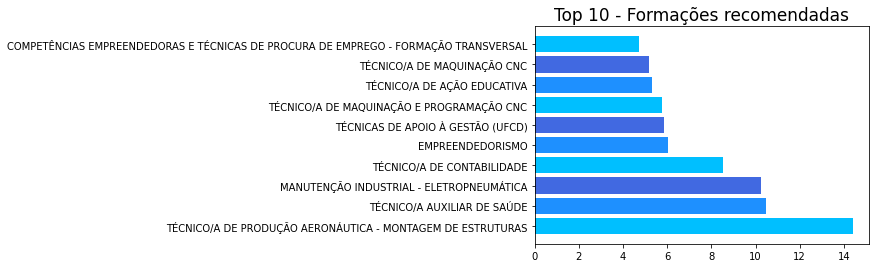

In [749]:
# Gráfico relativo ao sucesso e insucesso

plt.barh(final_indexes, final_scores, color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Top 10 - Formações recomendadas", size=17)